# Q3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## loading data

In [3]:
data = pd.read_csv('Bitcoin.csv')

## part a

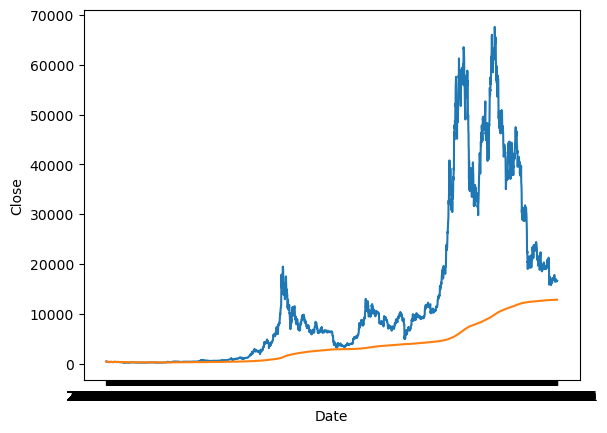

In [8]:
summ = 0
count = 0
meanarray = []
for index,row in data.iterrows():
    summ += row['Close']
    count += 1
    meanarray.append(summ/count)
plt.plot(data['Date'], data['Close'])
plt.plot(data['Date'], meanarray)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## part b _ 1

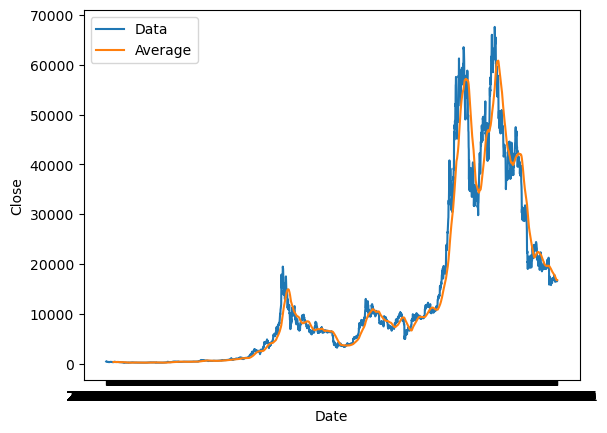

In [51]:
w_s = 50 
count = 0
summ = 0
weights = np.zeros(w_s)
meanarray = []
for index, row in data.iterrows():
    summ += row['Close']
    count += 1
    if count >= w_s:
        for j in range(w_s):
            weights[j] = 1
        weights /= np.sum(weights)
        mean = np.dot(weights, data['Close'][index-w_s+1:index+1])
        meanarray.append(mean)
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'], label='Data')
ax.plot(data['Date'][w_s-1:], meanarray, label='Average')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

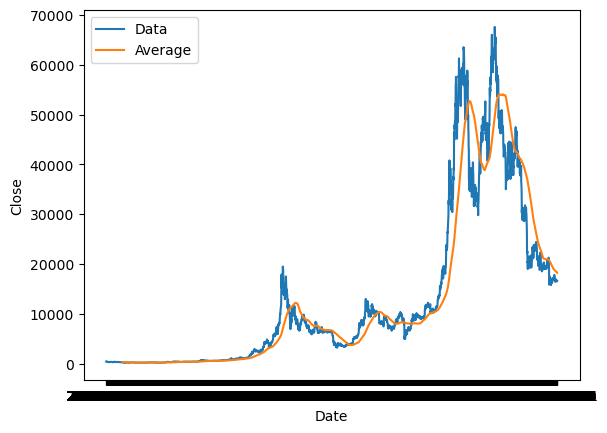

In [52]:
w_s = 110 
count = 0
summ = 0
weights = np.zeros(w_s)
meanarray = []
for index, row in data.iterrows():
    summ += row['Close']
    count += 1
    if count >= w_s:
        for j in range(w_s):
            weights[j] = 1
        weights /= np.sum(weights)
        mean = np.dot(weights, data['Close'][index-w_s+1:index+1])
        meanarray.append(mean)
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'], label='Data')
ax.plot(data['Date'][w_s-1:], meanarray, label='Average')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## part b_2

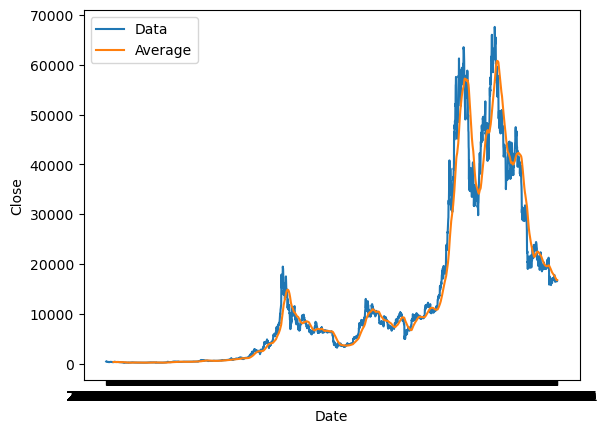

In [56]:
w_s = 50 
stepsize = .01
count = 0
summ = 0
weights = np.zeros(w_s)
meanarray = []
for index, row in data.iterrows():
    summ += row['Close']
    count += 1
    if count >= w_s:
        for j in range(w_s):
            weights[j] = np.exp(-stepsize*(w_s-j))
        weights /= np.sum(weights)
        mean = np.dot(weights, data['Close'][index-w_s+1:index+1])
        meanarray.append(mean)
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'], label='Data')
ax.plot(data['Date'][w_s-1:], meanarray, label='Average')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

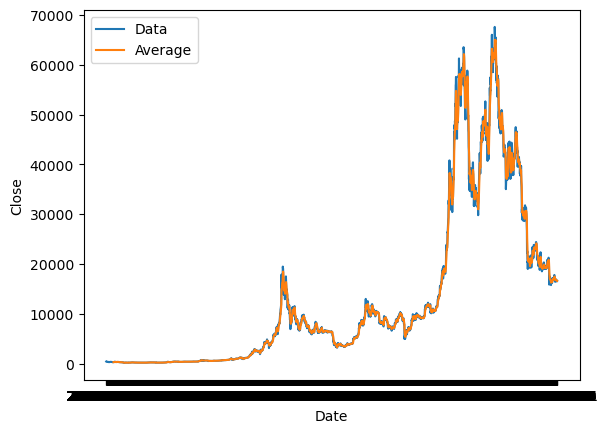

In [58]:
w_s = 50 
stepsize = .4
count = 0
summ = 0
weights = np.zeros(w_s)
meanarray = []
for index, row in data.iterrows():
    summ += row['Close']
    count += 1
    if count >= w_s:
        for j in range(w_s):
            weights[j] = np.exp(-stepsize*(w_s-j))
        weights /= np.sum(weights)
        mean = np.dot(weights, data['Close'][index-w_s+1:index+1])
        meanarray.append(mean)
fig, ax = plt.subplots()
ax.plot(data['Date'], data['Close'], label='Data')
ax.plot(data['Date'][w_s-1:], meanarray, label='Average')
ax.legend()
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## part_c

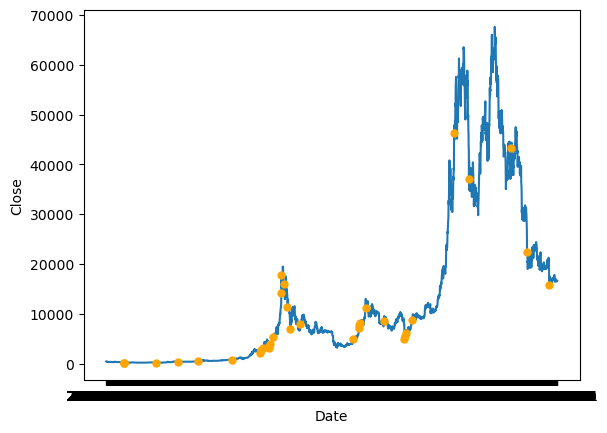

In [59]:
window_size = 60 
step_size = 5 
threshold = .25
sum_close = 0
count = 0
mean_array = []
var_all = []
plt.plot(data['Date'], data['Close'])
for index, row in data.iterrows():
    sum_close += row['Close']
    count += 1    
    if count >= window_size:
        weights = np.exp(-step_size * np.arange(window_size))
        weights /= weights.sum()
        mean_array.append(np.dot(weights, row['Close']))
        var_all.append(np.dot(weights, (row['Close'] - mean_array[-1]) ** 2))
        sum_close -= data.loc[index - window_size + 1, 'Close']
        count -= 1        
        if len(var_all) > 1:
            var_change = np.abs(var_all[-1] - var_all[-2]) / var_all[-2]
            if var_change > threshold:
                plt.plot(row['Date'], row['Close'], color='orange', marker='o', markersize=5)   
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

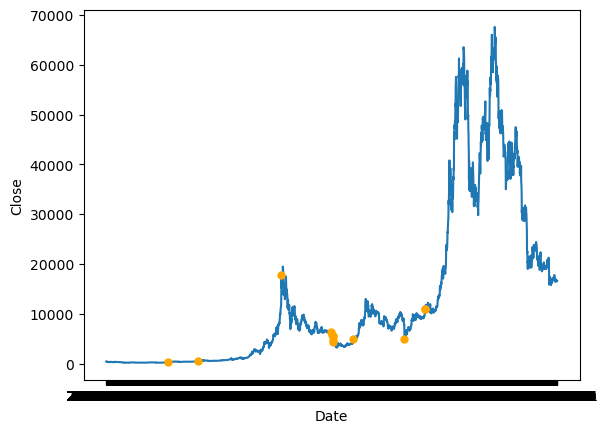

In [61]:
window_size = 60 
threshold = .25
sum_close = 0
count = 0
mean_array = []
var_all = []
plt.plot(data['Date'], data['Close'])
for index, row in data.iterrows():
    sum_close += row['Close']
    count += 1
    if count >= window_size:
        mean_array.append(sum_close / window_size)
        var_all.append(np.sum((data.loc[index - window_size + 1:index, 'Close'] - mean_array[-1]) ** 2) / window_size)
        sum_close -= data.loc[index - window_size + 1, 'Close']
        count -= 1
        if len(var_all) > 1:
            var_change = np.abs(var_all[-1] - var_all[-2]) / var_all[-2]
            if var_change > threshold:
                plt.plot(row['Date'], row['Close'], color='orange', marker='o', markersize=5)        
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()